# **LetsGrowMore Virtual Internship Program (VIP) - August 2022**


## **Advanced Level**

## **Task-7 : Develop A Neural Network That Can Read Handwriting**

## **Name: Jagdish Ramesh Parihar**

In [ ]:
# Importing Libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [ ]:
# Loading The MNIST Dataset With The Associated Train & Test Variables
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.mnist.load_data()

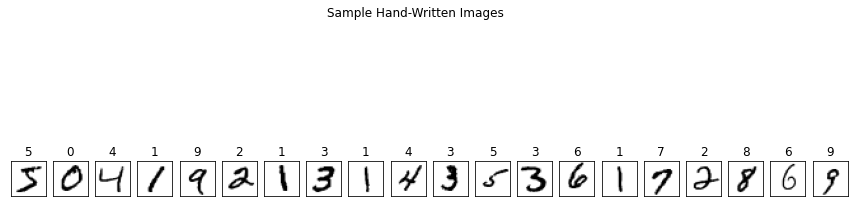

In [ ]:
# Showing Samples of Hand-Written Images
figure,axis=plt.subplots(ncols=20,sharex=False,sharey=True,figsize=(15,5))
figure.suptitle("Sample Hand-Written Images")
for i in range(20):
  axis[i].set_title(Y_train[i])
  axis[i].imshow(X_train[i],cmap='gray_r')
  axis[i].get_xaxis().set_visible(False)
  axis[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Data Preprocessing Stage
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
img_input=(28,28,1)
clnum=10
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
# Creating The CNN Model To Predict & Read The Handwriting
cnn=Sequential()
cnn.add(Conv2D(128,kernel_size=(3,3),activation=tf.nn.relu,input_shape=img_input))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.3))
cnn.add(Conv2D(64,(3,3),activation=tf.nn.relu))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.3))
cnn.add(Conv2D(32,(3,3),activation=tf.nn.relu))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.3))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.3))
cnn.add(Flatten())
cnn.add(Dense(128,activation=tf.nn.relu))
cnn.add(Dropout(0.3))
cnn.add(Dense(clnum,activation=tf.nn.softmax))

In [ ]:
# Training The CNN Model On The Training Set
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
runtime=cnn.fit(x=X_train,y=Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1688/1688 [==============================] - 655s 387ms/step - loss: 0.2120 - accuracy: 0.9386 - val_loss: 0.0967 - val_accuracy: 0.9825
Epoch 2/10
1688/1688 [==============================] - 652s 386ms/step - loss: 0.1009 - accuracy: 0.9713 - val_loss: 0.0986 - val_accuracy: 0.9802
Epoch 3/10
1688/1688 [==============================] - 662s 392ms/step - loss: 0.0784 - accuracy: 0.9768 - val_loss: 0.1419 - val_accuracy: 0.9777
Epoch 4/10
1688/1688 [==============================] - 666s 394ms/step - loss: 0.0653 - accuracy: 0.9810 - val_loss: 0.0830 - val_accuracy: 0.9852
Epoch 5/10
1688/1688 [==============================] - 657s 389ms/step - loss: 0.0597 - accuracy: 0.9830 - val_loss: 0.0849 - val_accuracy: 0.9878
Epoch 6/10
1688/1688 [==============================] - 648s 384ms/step - loss: 0.0542 - accuracy: 0.9845 - val_loss: 0.2031 - val_accuracy: 0.9797
Epoch 7/10
1688/1688 [==============================] - 649s 385ms/step - loss: 0.0472 - accuracy: 0.9868 - val_

In [ ]:
# Analysing The Model For Its Accuracy
from tensorflow.keras.models import load_model
cnn.save('HandPred.h5')
cnn=load_model('HandPred.h5')
met=cnn.evaluate(X_test,Y_test)
print("Accuracy Of The Hand Writing Prediction Model -> ",met[1]*100,"%")

313/313 [==============================] - 25s 78ms/step - loss: 0.1159 - accuracy: 0.9834
Accuracy Of The Hand Writing Prediction Model ->  98.33999872207642 %


In [ ]:
pred_y=cnn.predict(X_test)
pred_label_y=[np.argmax(i) for i in pred_y]
confusion=tf.math.confusion_matrix(labels=Y_test,predictions=pred_label_y)
print(confusion)

tf.Tensor(
[[ 977    2    0    0    0    0    0    1    0    0]
 [   0 1132    1    2    0    0    0    0    0    0]
 [   2   13 1006    3    0    0    0    8    0    0]
 [   0    0    0 1006    0    2    0    1    0    1]
 [   0   10    1    0  924    0    2    3    0   42]
 [   1    0    0    4    0  885    1    0    0    1]
 [   9    7    0    0    1    2  939    0    0    0]
 [   0    2    3    1    0    1    0 1019    0    2]
 [   4    2    2    1    0    2    0    2  953    8]
 [   1    3    0    2    1    2    0    7    0  993]], shape=(10, 10), dtype=int32)


Model's Predicted Value:  7
The Prediction is CORRECT!


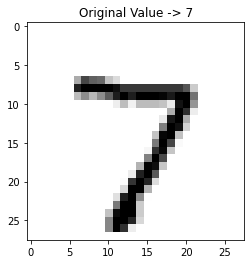

In [ ]:
# Running & Testing The Model On Various Hand-Written Images
im1=X_test[0]
plt.imshow(np.squeeze(im1),cmap='gray_r')
plt.title('Original Value -> {}'.format(Y_test[0]))
prediction=cnn.predict(X_test)
print("Model's Predicted Value: ",np.argmax(prediction[0]))
if(Y_test[0]==(np.argmax(prediction[0]))):
  print('The Prediction is CORRECT!')
else:
  print('The Prediction is WRONG!')

Model's Predicted Value:  2
The Prediction is CORRECT!


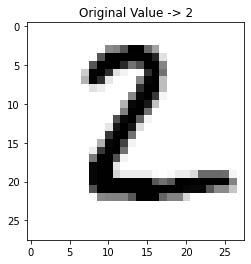

In [ ]:
im2=X_test[1]
plt.imshow(np.squeeze(im2),cmap='gray_r')
plt.title('Original Value -> {}'.format(Y_test[1]))
prediction=cnn.predict(X_test)
print("Model's Predicted Value: ",np.argmax(prediction[1]))
if(Y_test[1]==(np.argmax(prediction[1]))):
  print('The Prediction is CORRECT!')
else:
  print('The Prediction is WRONG!')

Model's Predicted Value:  1
The Prediction is CORRECT!


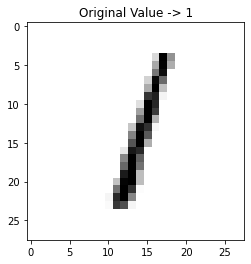

In [ ]:
im3=X_test[2]
plt.imshow(np.squeeze(im3),cmap='gray_r')
plt.title('Original Value -> {}'.format(Y_test[2]))
prediction=cnn.predict(X_test)
print("Model's Predicted Value: ",np.argmax(prediction[2]))
if(Y_test[2]==(np.argmax(prediction[2]))):
  print('The Prediction is CORRECT!')
else:
  print('The Prediction is WRONG!')

Model's Predicted Value:  0
The Prediction is CORRECT!


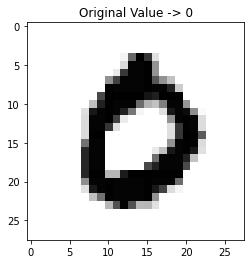

In [ ]:
im4=X_test[3]
plt.imshow(np.squeeze(im4),cmap='gray_r')
plt.title('Original Value -> {}'.format(Y_test[3]))
prediction=cnn.predict(X_test)
print("Model's Predicted Value: ",np.argmax(prediction[3]))
if(Y_test[3]==(np.argmax(prediction[3]))):
  print('The Prediction is CORRECT!')
else:
  print('The Prediction is WRONG!')

Model's Predicted Value:  4
The Prediction is CORRECT!


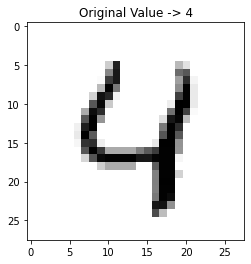

In [ ]:
im5=X_test[4]
plt.imshow(np.squeeze(im5),cmap='gray_r')
plt.title('Original Value -> {}'.format(Y_test[4]))
prediction=cnn.predict(X_test)
print("Model's Predicted Value: ",np.argmax(prediction[4]))
if(Y_test[4]==(np.argmax(prediction[4]))):
  print('The Prediction is CORRECT!')
else:
  print('The Prediction is WRONG!')